# Разведочный анализ данных: продолжение

Мы будем работать с датасетом про алмазы - в нем содержатся их различные характеристики, а также стоимость.

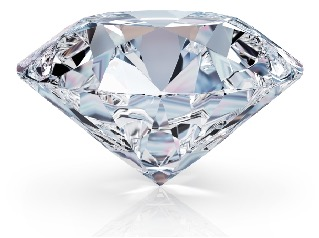

## Импорт библиотек и загрузка данных

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df = pd.read_csv('../diamonds_encoded.csv', index_col=0)
df

,carat,depth,table,price,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_mapped,cut_mapped
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6,5
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5,4
2,0.23,56.9,65.0,327.0,4.05,4.07,2.31,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,2
3,0.29,62.4,58.0,334.0,4.20,4.23,2.63,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4,4
4,0.31,63.3,58.0,335.0,4.34,4.35,2.75,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53781,0.74,63.1,59.0,2753.0,5.71,5.74,3.61,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5,2
53782,0.90,63.2,60.0,2753.0,6.12,6.09,3.86,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5,3
53783,0.76,59.3,62.0,2753.0,5.93,5.85,3.49,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3,4
53784,0.76,62.2,55.0,2753.0,5.89,5.87,3.66,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,5


## Описание данных

* `carat` - число каратов алмаза
* `cut` - огранка алмаза
* `color` - цвет алмаза
* `clarity` - прозрачность алмаза
* `depth` - глубина алмаза
* `table` - платформа алмаза (грань, которую можно увидеть, если смотреть на камень лицевой стороной вверх)
* `price` - цена алмаза
* `x` - размер алмаза по оси x
* `y` - размер алмаза по оси y
* `z` - размер алмаза по оси z

In [72]:
df.head()

,carat,depth,table,price,x,y,z,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_mapped,cut_mapped
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6,5
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5,4
2,0.23,56.9,65.0,327.0,4.05,4.07,2.31,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,2
3,0.29,62.4,58.0,334.0,4.20,4.23,2.63,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4,4
4,0.31,63.3,58.0,335.0,4.34,4.35,2.75,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6,2


## Исследование данных

Размер датасета

In [73]:
df.shape

(53767, 16)

Информация о типах данных и пропусках

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53767 entries, 0 to 53785
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carat           53767 non-null  float64
 1   depth           53767 non-null  float64
 2   table           53767 non-null  float64
 3   price           53767 non-null  float64
 4   x               53767 non-null  float64
 5   y               53767 non-null  float64
 6   z               53767 non-null  float64
 7   color_D         53767 non-null  float64
 8   color_E         53767 non-null  float64
 9   color_F         53767 non-null  float64
 10  color_G         53767 non-null  float64
 11  color_H         53767 non-null  float64
 12  color_I         53767 non-null  float64
 13  color_J         53767 non-null  float64
 14  clarity_mapped  53767 non-null  int64  
 15  cut_mapped      53767 non-null  int64  
dtypes: float64(14), int64(2)
memory usage: 7.0 MB


## Взаимозависимость в данных

### 1. Корреляция

**Корреляция Пирсона**

pearson.svg

Корреляция Пирсона - это мера линейной взаимосвязи двух числовых столбцов.

* $r$	=	correlation coefficient
* $x_{i}$	=	values of the x-variable in a sample
* $\bar{x}$	=	mean of the values of the x-variable
* $y_{i}$	=	values of the y-variable in a sample
* $\bar{y}$	=	mean of the values of the y-variable

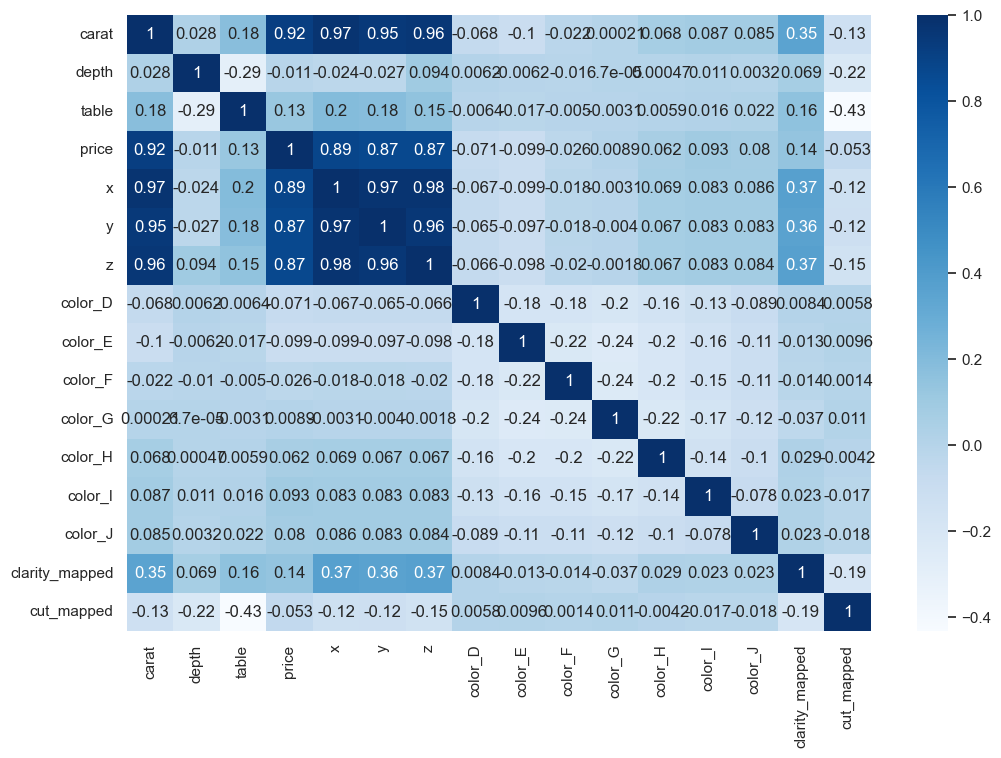

In [75]:
corr = df.corr() # матрица корреляций
sns.set_theme(rc={"figure.figsize": (12, 8)})
sns.heatmap(corr, cmap="Blues", annot=True)
plt.show()

**Корреляция Спирмена**

Коэффициент корреляции Спирмена основан на ранжировании значений переменных и измеряет степень монотонной связи между ними.

Значение коэффициента корреляции Спирмена лежит в диапазоне от -1 до 1. Значение -1 означает полную отрицательную связь (чем больше одна переменная, тем меньше другая), значение 1 означает положительную связь (чем больше одна переменная, тем больше другая), а значение 0 означает отсутствие связи между переменными.

Можно использовать для порядковых переменных!

spearman.svg

* $\rho$	=	Spearman's rank correlation coefficient
* $d_{i}$	=	difference between the two ranks of each observation
* $n$	=	number of observations

[Пример расчета коэффициента корреляции Спирмена](https://statpsy.ru/spearman/primer-raschet-spearman/)

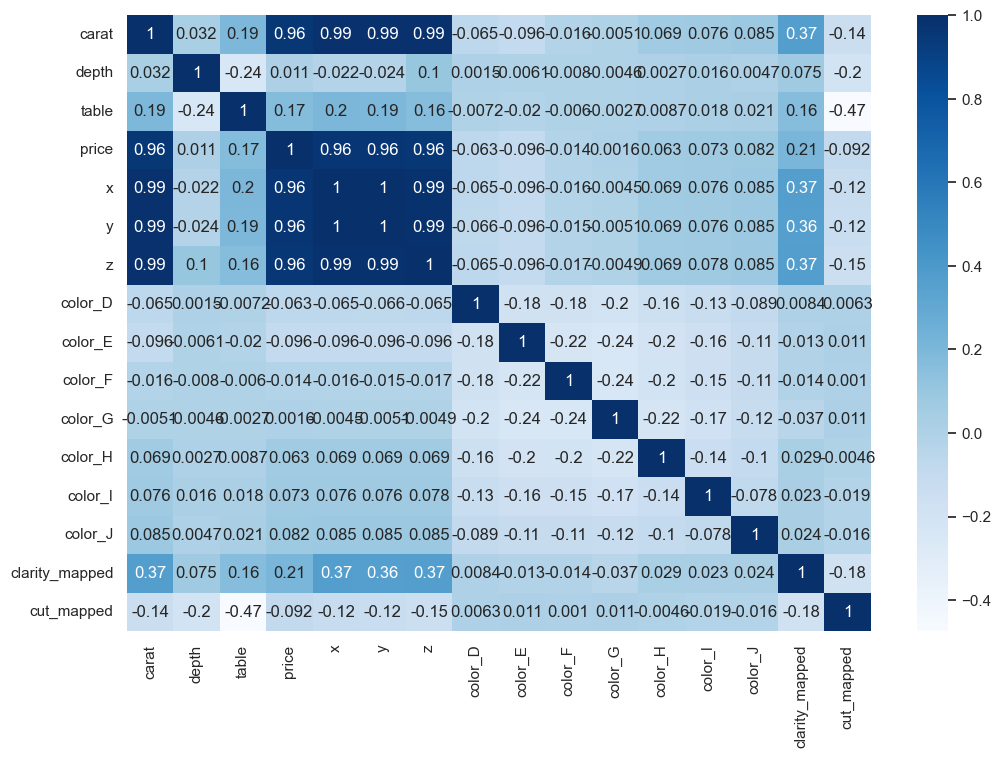

In [76]:
corr = df.corr(method='spearman')

sns.set_theme(rc={"figure.figsize": (12, 8)})
sns.heatmap(corr, cmap="Blues", annot=True)
plt.show()

**Корреляция Кендалла**

Чаще используется для пары номинальный - номинальный признак.

Похожа на корреляцию Спирмена.

### Задание 1

Вычислите матрицу корреляций, используя корреляцию Кендалла.

С каким столбцом коррелирует в этой матрице `depth` больше всего?

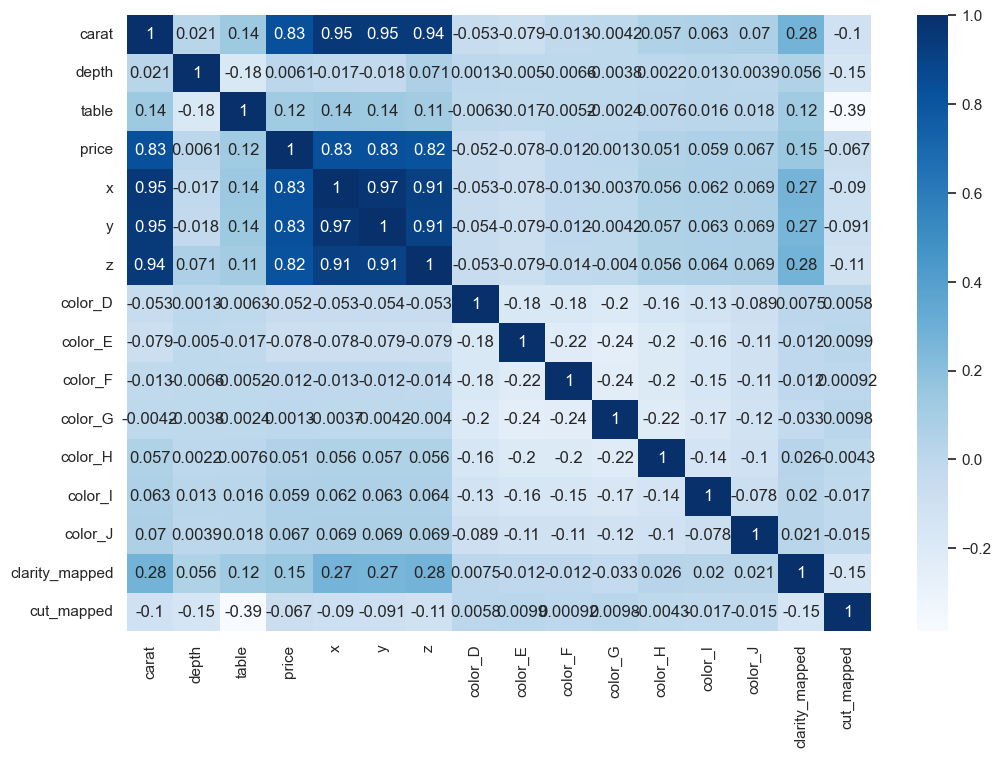

In [77]:
# your code here

corr = df.corr(method='kendall')

sns.set_theme(rc={"figure.figsize": (12, 8)})
sns.heatmap(corr, cmap="Blues", annot=True)
plt.show()

### 2. V-мера Крамера

*Для измерения связи между Категориальным - Категориальным признаком*

Для оценки степени взаимосвязи категориальных столбцов можно вычислять V-меру Крамера.
Это вариант нормировки статистики $\chi^2$. Статистика $\chi^2$ - это функция, измеряющая меру взаимосвязи двух категориальных переменных.

Пусть $X, Y$ - две категориальных переменных, тогда $\chi^2$ вычисляется по формуле

$$\chi^2(X,Y)=\sum_{i,j}\frac{(O_{ij}-E_{ij})^2}{E_{ij}},$$

где $O_{ij}$ - наблюдаемая частота события, $E_{ij}$ - ожидаемая частота события (в предположении, что величины $X$ и $Y$ независимы).

Чем больше значение $\chi^2$ - тем больше степень взаимосвязи переменных $X$ и $Y$.



**Покажем на примере.**

Изучим по некоторым данным зависимость факта курения и повышенного давления. По данным составим таблицу сопряженности.

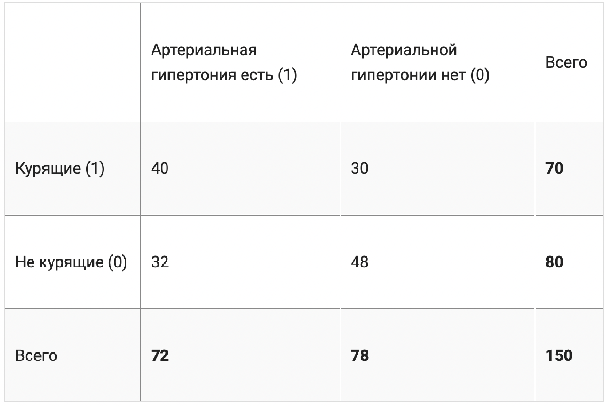

Вычисляем $\chi^2$:

$O_{11} = 40$

$E_{11} = 70 * 72 / 150 \approx 33.6 $ (так считается $E_{ij}$, если величины независимы)

Аналогично вычисляются оставшиеся слагаемые в формуле. Получаем

$\chi^2(X,Y) = (40-33.6)^2/33.6 + (30-36.4)^2/36.4 + (32-38.4)^2/38.4 + (48-41.6)^2/41.6 = 4.396$



Чем больше $\chi^2$, тем больше взаимосвязь между признаками.

В случае, если признаки независимы, то ожидаемая и наблюдаемая частоты совпадут, и $\chi^2=0$.



V-мера Крамера - это нормировка $\chi^2$ на число значений в каждой категории:

$$V = \sqrt{\frac{\chi^2/n}{min(k-1,r-1)}},$$

где


$n$ - общее число наблюдений

$k$ - число категорий в $X$

$r$ - число категорий в $Y$


В результате этой нормировки V-мера находится на отрезке от 0 до 1 и легко интерпретируется: *чем больше V-мера - тем больше зависимость между двумя переменными, и наоборот.*

In [78]:
!pip install association-metrics -q


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\Elisey\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [79]:
df = pd.read_csv('../diamonds_clean.csv', index_col=0)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53800,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50
53801,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53802,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53803,0.86,Premium,H,SI2,61.0,58.0,2757.0,6.15,6.12,3.74


In [80]:
pd.qcut(df['price'], q=10)

0        (325.999, 645.5]
1        (325.999, 645.5]
2        (325.999, 645.5]
3        (325.999, 645.5]
4        (325.999, 645.5]
               ...       
53800    (2401.0, 3465.0]
53801    (2401.0, 3465.0]
53802    (2401.0, 3465.0]
53803    (2401.0, 3465.0]
53804    (2401.0, 3465.0]
Name: price, Length: 53786, dtype: category
Categories (10, interval[float64, right]): [(325.999, 645.5] < (645.5, 837.0] < (837.0, 1088.0] < (1088.0, 1699.0] ... (3465.0, 4662.0] < (4662.0, 6301.0] < (6301.0, 9817.0] < (9817.0, 18823.0]]

In [81]:
pd.qcut(df['price'], q=10)

0        (325.999, 645.5]
1        (325.999, 645.5]
2        (325.999, 645.5]
3        (325.999, 645.5]
4        (325.999, 645.5]
               ...       
53800    (2401.0, 3465.0]
53801    (2401.0, 3465.0]
53802    (2401.0, 3465.0]
53803    (2401.0, 3465.0]
53804    (2401.0, 3465.0]
Name: price, Length: 53786, dtype: category
Categories (10, interval[float64, right]): [(325.999, 645.5] < (645.5, 837.0] < (837.0, 1088.0] < (1088.0, 1699.0] ... (3465.0, 4662.0] < (4662.0, 6301.0] < (6301.0, 9817.0] < (9817.0, 18823.0]]

In [82]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
df['bin'] = pd.qcut(df['price'], q=10)
encoded_bins = encoder.fit_transform(df[['bin']])
bins = encoder.categories_[0]
df.drop(columns=['bin'], inplace=True)
df = pd.concat([df, pd.DataFrame(encoded_bins, columns=[f'price_bin_{x}' for x in bins])], axis=1, join='inner')
df

,carat,cut,color,clarity,depth,table,price,x,y,z,"price_bin_(325.999, 645.5]","price_bin_(645.5, 837.0]","price_bin_(837.0, 1088.0]","price_bin_(1088.0, 1699.0]","price_bin_(1699.0, 2401.0]","price_bin_(2401.0, 3465.0]","price_bin_(3465.0, 4662.0]","price_bin_(4662.0, 6301.0]","price_bin_(6301.0, 9817.0]","price_bin_(9817.0, 18823.0]"
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53781,0.74,Good,D,SI1,63.1,59.0,2753.0,5.71,5.74,3.61,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
53782,0.90,Very Good,J,SI1,63.2,60.0,2753.0,6.12,6.09,3.86,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
53783,0.76,Premium,I,VS1,59.3,62.0,2753.0,5.93,5.85,3.49,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
53784,0.76,Ideal,I,VVS1,62.2,55.0,2753.0,5.89,5.87,3.66,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [83]:
import association_metrics as am

df_cat = df.apply(lambda x: x.astype("category") if (x.dtype == "object") or ('price_bin' in x.name) else x)

cramersv = am.CramersV(df_cat)

cramersv.fit()

C:\Users\Elisey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\association_metrics\categorical.py:100: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  self.matrix[x][

,cut,color,clarity,"price_bin_(325.999, 645.5]","price_bin_(645.5, 837.0]","price_bin_(837.0, 1088.0]","price_bin_(1088.0, 1699.0]","price_bin_(1699.0, 2401.0]","price_bin_(2401.0, 3465.0]","price_bin_(3465.0, 4662.0]","price_bin_(4662.0, 6301.0]","price_bin_(6301.0, 9817.0]","price_bin_(9817.0, 18823.0]"
cut,1.000000,0.037668,0.142328,0.054853,0.072943,0.107541,0.051705,0.043592,0.056548,0.110520,0.066707,0.033838,0.065982
color,0.037668,1.000000,0.079496,0.026504,0.070224,0.099905,0.087011,0.035844,0.060709,0.053587,0.091548,0.095340,0.109269
clarity,0.142328,0.079496,1.000000,0.052698,0.123691,0.224324,0.080914,0.062624,0.054381,0.241019,0.178041,0.104941,0.059600
"price_bin_(325.999, 645.5]",0.054853,0.026504,0.052698,1.000000,0.111210,0.111279,0.110992,0.111256,0.111061,0.111175,0.111026,0.111152,0.111061
"price_bin_(645.5, 837.0]",0.072943,0.070224,0.123691,0.111210,1.000000,0.111325,0.111037,0.111302,0.111106,0.111221,0.111072,0.111198,0.111106
"price_bin_(837.0, 1088.0]",0.107541,0.099905,0.224324,0.111279,0.111325,1.000000,0.111106,0.111371,0.111175,0.111290,0.111141,0.111267,0.111175
"price_bin_(1088.0, 1699.0]",0.051705,0.087011,0.080914,0.110992,0.111037,0.111106,1.000000,0.111083,0.110888,0.111003,0.110854,0.110980,0.110888
"price_bin_(1699.0, 2401.0]",0.043592,0.035844,0.062624,0.111256,0.111302,0.111371,0.111083,1.000000,0.111152,0.111267,0.111118,0.111244,0.111152
"price_bin_(2401.0, 3465.0]",0.056548,0.060709,0.054381,0.111061,0.111106,0.111175,0.110888,0.111152,1.000000,0.111072,0.110923,0.111049,0.110957
"price_bin_(3465.0, 4662.0]",0.110520,0.053587,0.241019,0.111175,0.111221,0.111290,0.111003,0.111267,0.111072,1.000000,0.111038,0.111164,0.111072


### 3. ANOVA

*Для измерения связи между Числовым - Категориальным признаком*

ANOVA (англ. Analysis of Variance) - это статистический метод, используемый для сравнения средних значений между тремя и более группами. ANOVA анализирует различия между средними значениями внутри групп и между группами, чтобы определить, есть ли статистически значимые различия между ними.

ANOVA основан на предположении, что переменная, которая анализируется, является нормально распределенной в каждой группе, и что дисперсия внутри групп равномерна. В результате, ANOVA проверяет, насколько различны средние значения между группами по сравнению со случайной вариацией внутри групп.

ANOVA производит F-тест, который сравнивает дисперсию между группами с дисперсией внутри групп. Если различия между группами значительны по сравнению со случайной вариацией внутри групп, то F-тест покажет статистически значимый результат, указывающий на наличие различий между группами.

In [19]:
# Generating sample data
import pandas as pd
ColumnNames=['FuelType','CarPrice']
DataValues= [
             [  'Petrol',   2000],
             [  'Petrol',   2100],
             [  'Petrol',   1900],
             [  'Petrol',   2150],
             [  'Petrol',   2100],
             [  'Petrol',   2200],
             [  'Petrol',   1950],
             [  'Diesel',   2500],
             [  'Diesel',   2700],
             [  'Diesel',   2900],
             [  'Diesel',   2850],
             [  'Diesel',   2600],
             [  'Diesel',   2500],
             [  'Diesel',   2700],
             [  'CNG',   1500],
             [  'CNG',   1400],
             [  'CNG',   1600],
             [  'CNG',   1650],
             [  'CNG',   1600],
             [  'CNG',   1500],
             [  'CNG',   1500]
           ]
#Create the Data Frame
CarData=pd.DataFrame(data=DataValues,columns=ColumnNames)

########################################################
# f_oneway() function takes the group data as input and
# returns F-statistic and P-value

from scipy.stats import f_oneway

# Running the one-way anova test between CarPrice and FuelTypes
# Assumption(H0) is that FuelType and CarPrices are NOT correlated

# Finds out the Prices data for each FuelType as a list

CategoryGroupLists = CarData.groupby('FuelType')['CarPrice'].apply(list)

# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value >= 0.05

AnovaResults = f_oneway(*CategoryGroupLists)

print('P-Value for Anova is: ', AnovaResults[1])

if AnovaResults[1] >= 0.05:
    print('Features are NOT correlated')
else:
    print('Features are correlated')

P-Value for Anova is:  4.355846642460201e-12
Features are correlated


In [22]:
Data = []

for c1 in df.columns:
    for c2 in df.columns:
        if df[c1].dtype == 'object' and df[c2].dtype != 'object':
            CategoryGroupLists = df.groupby(c1)[c2].apply(list)
            AnovaResults = f_oneway(*CategoryGroupLists)

            if AnovaResults[1] >= 0.05:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'No'})
            else:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'Yes'})

AnovaRes = pd.DataFrame.from_dict(Data)
AnovaRes

,Category,Numerical,Is correlated
0,cut,carat,Yes
1,cut,depth,Yes
2,cut,table,Yes
3,cut,price,Yes
4,cut,x,Yes
5,cut,y,Yes
6,cut,z,Yes
7,color,carat,Yes
8,color,depth,Yes
9,color,table,Yes


## Polars

В конце 2020 года в python стала доступна библиотека Polars.

Polars - это высокопроизводительная библиотека для манипуляции и анализа данных в Python и Rust. Она была создана как альтернатива Pandas, но с учетом возможностей параллельной обработки данных на многопроцессорных системах.

Одним из основных преимуществ Polars является его скорость работы с данными. Polars использует многопоточную обработку данных, что позволяет обрабатывать большие объемы данных на многопроцессорных системах в несколько раз быстрее, чем Pandas. Кроме того, Polars имеет более эффективную систему памяти, что позволяет работать с данными, которые не помещаются в оперативной памяти.


Хорошая [статья про сравнение Pandas и Polars](https://vc.ru/u/1389654-machine-learning/583603-pandas-vs-polars-sravnenie-sintaksisa-i-skorosti)

In [23]:
df_big = df.copy()

for i in range(50):
  df_big = pd.concat([df_big, df])

df_big.to_csv("../diamonds_big.csv", index=False)

In [24]:
df_big.shape, df.shape

((2743086, 10), (53786, 10))

In [25]:
#!pip install polars

import polars as pl

print(pl.__version__)

1.35.2


### Загрузка данных

In [27]:
%%time

df_pl = pl.read_csv("../diamonds_big.csv")

CPU times: total: 750 ms
Wall time: 80.9 ms


In [28]:
%%time

df = pd.read_csv("../diamonds_big.csv")

CPU times: total: 1.12 s
Wall time: 1.16 s


### Выбор и фильтрация данных

In [29]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


In [30]:
%%time

df[['carat', 'depth']]

CPU times: total: 15.6 ms
Wall time: 15.4 ms


,carat,depth
0,0.23,61.5
1,0.21,59.8
2,0.23,56.9
3,0.29,62.4
4,0.31,63.3
...,...,...
2743081,0.72,60.8
2743082,0.72,63.1
2743083,0.70,62.8
2743084,0.86,61.0


In [31]:
%%time

df_pl[['carat', 'depth']]

# df_pl.select(pl.col(['carat', 'depth']))

CPU times: total: 0 ns
Wall time: 13.1 μs


carat,depth
f64,f64
0.23,61.5
0.21,59.8
0.23,56.9
0.29,62.4
0.31,63.3
…,…
0.72,60.8
0.72,63.1
0.7,62.8


In [33]:
%%time

df.query('carat > 5')

CPU times: total: 31.2 ms
Wall time: 28.3 ms


,carat,cut,color,clarity,depth,table,price,x,y,z
27341,5.01,Fair,J,I1,65.5,59.0,18018.0,10.74,10.54,6.98
81127,5.01,Fair,J,I1,65.5,59.0,18018.0,10.74,10.54,6.98
134913,5.01,Fair,J,I1,65.5,59.0,18018.0,10.74,10.54,6.98
188699,5.01,Fair,J,I1,65.5,59.0,18018.0,10.74,10.54,6.98
242485,5.01,Fair,J,I1,65.5,59.0,18018.0,10.74,10.54,6.98
296271,5.01,Fair,J,I1,65.5,59.0,18018.0,10.74,10.54,6.98
350057,5.01,Fair,J,I1,65.5,59.0,18018.0,10.74,10.54,6.98
403843,5.01,Fair,J,I1,65.5,59.0,18018.0,10.74,10.54,6.98
457629,5.01,Fair,J,I1,65.5,59.0,18018.0,10.74,10.54,6.98
511415,5.01,Fair,J,I1,65.5,59.0,18018.0,10.74,10.54,6.98


In [35]:
%%time

df_pl.filter(pl.col('carat') > 5)

CPU times: total: 0 ns
Wall time: 6.08 ms


carat,cut,color,clarity,depth,table,price,x,y,z
f64,str,str,str,f64,f64,f64,f64,f64,f64
5.01,"""Fair""","""J""","""I1""",65.5,59.0,18018.0,10.74,10.54,6.98
5.01,"""Fair""","""J""","""I1""",65.5,59.0,18018.0,10.74,10.54,6.98
5.01,"""Fair""","""J""","""I1""",65.5,59.0,18018.0,10.74,10.54,6.98
5.01,"""Fair""","""J""","""I1""",65.5,59.0,18018.0,10.74,10.54,6.98
5.01,"""Fair""","""J""","""I1""",65.5,59.0,18018.0,10.74,10.54,6.98
…,…,…,…,…,…,…,…,…,…
5.01,"""Fair""","""J""","""I1""",65.5,59.0,18018.0,10.74,10.54,6.98
5.01,"""Fair""","""J""","""I1""",65.5,59.0,18018.0,10.74,10.54,6.98
5.01,"""Fair""","""J""","""I1""",65.5,59.0,18018.0,10.74,10.54,6.98


### Задание 2

С помощью polars и pandas отфильтруйте таблицу, оставив в ней только строки, удовлетворяющие условиям:
* `color` = "J"
* `price` > 1000

Сравните время выполнения запросов

In [36]:
%%time

df[(df.color == 'J') & (df.price > 1000)]

CPU times: total: 93.8 ms
Wall time: 92.4 ms


,carat,cut,color,clarity,depth,table,price,x,y,z
172,1.17,Very Good,J,I1,60.2,61.0,2774.0,6.83,6.90,4.13
247,1.05,Very Good,J,SI2,63.2,56.0,2789.0,6.49,6.45,4.09
255,1.05,Fair,J,SI2,65.8,59.0,2789.0,6.41,6.27,4.18
324,1.00,Premium,J,SI2,62.3,58.0,2801.0,6.45,6.34,3.98
366,0.93,Premium,J,SI2,61.9,57.0,2807.0,6.21,6.19,3.84
...,...,...,...,...,...,...,...,...,...,...
2742848,0.90,Good,J,SI2,63.9,56.0,2717.0,6.17,6.10,3.92
2742933,0.90,Good,J,SI1,63.2,60.0,2729.0,6.09,6.12,3.86
2742994,0.82,Ideal,J,VS2,61.6,56.0,2741.0,6.00,6.04,3.71
2742998,0.83,Ideal,J,VS2,62.3,55.0,2742.0,6.01,6.03,3.75


In [37]:
%%time

df_pl.filter((pl.col('color') == 'J') & (pl.col('price') > 1000))

CPU times: total: 62.5 ms
Wall time: 12.7 ms


carat,cut,color,clarity,depth,table,price,x,y,z
f64,str,str,str,f64,f64,f64,f64,f64,f64
1.17,"""Very Good""","""J""","""I1""",60.2,61.0,2774.0,6.83,6.9,4.13
1.05,"""Very Good""","""J""","""SI2""",63.2,56.0,2789.0,6.49,6.45,4.09
1.05,"""Fair""","""J""","""SI2""",65.8,59.0,2789.0,6.41,6.27,4.18
1.0,"""Premium""","""J""","""SI2""",62.3,58.0,2801.0,6.45,6.34,3.98
0.93,"""Premium""","""J""","""SI2""",61.9,57.0,2807.0,6.21,6.19,3.84
…,…,…,…,…,…,…,…,…,…
0.9,"""Good""","""J""","""SI2""",63.9,56.0,2717.0,6.17,6.1,3.92
0.9,"""Good""","""J""","""SI1""",63.2,60.0,2729.0,6.09,6.12,3.86
0.82,"""Ideal""","""J""","""VS2""",61.6,56.0,2741.0,6.0,6.04,3.71


### Агрегация данных

In [38]:
df_pl.head()

carat,cut,color,clarity,depth,table,price,x,y,z
f64,str,str,str,f64,f64,f64,f64,f64,f64
0.23,"""Ideal""","""E""","""SI2""",61.5,55.0,326.0,3.95,3.98,2.43
0.21,"""Premium""","""E""","""SI1""",59.8,61.0,326.0,3.89,3.84,2.31
0.23,"""Good""","""E""","""VS1""",56.9,65.0,327.0,4.05,4.07,2.31
0.29,"""Premium""","""I""","""VS2""",62.4,58.0,334.0,4.2,4.23,2.63
0.31,"""Good""","""J""","""SI2""",63.3,58.0,335.0,4.34,4.35,2.75


In [39]:
%%time

df.groupby('cut').agg({'table' : 'mean', 'price' : 'max'})

CPU times: total: 109 ms
Wall time: 116 ms


,table,price
cut,,
Fair,59.059236,18574.0
Good,58.675852,18707.0
Ideal,55.952866,18806.0
Premium,58.747878,18823.0
Very Good,57.956123,18818.0


In [41]:
%%time

df_pl.group_by('cut').agg([pl.mean('table'), pl.max('price')])

CPU times: total: 188 ms
Wall time: 31.8 ms


cut,table,price
str,f64,f64
"""Fair""",59.059236,18574.0
"""Premium""",58.747878,18823.0
"""Ideal""",55.952866,18806.0
"""Very Good""",57.956123,18818.0
"""Good""",58.675852,18707.0


In [43]:
%%time

q = (
    df_pl
    .lazy()
    .group_by(by='cut')
    .agg(
        [
            pl.col('table').mean(),
            pl.col('price').max()
        ]
    )
)

CPU times: total: 0 ns
Wall time: 0 ns


In [44]:
%%time

q.collect()

CPU times: total: 78.1 ms
Wall time: 24.7 ms


by,table,price
str,f64,f64
"""Fair""",59.059236,18574.0
"""Ideal""",55.952866,18806.0
"""Premium""",58.747878,18823.0
"""Good""",58.675852,18707.0
"""Very Good""",57.956123,18818.0


### Задание 3

Для каждого цвета (`color`) вычислите медианную стоимость алмазов и средний вес (`carat`).

* Сначала напишите eager-запрос в стиле, приближенном к pandas.

* Затем напишите lazy-запрос в polars-стиле. После этого выполните запрос методом collect.

* Сравните время выполнения запросов.



In [51]:
%%time
result_eager = df_pl.group_by('color').agg([
    pl.median('price').alias('median_price'),
    pl.mean('carat').alias('avg_carat')
]).sort('color')
result_eager

CPU times: total: 766 ms
Wall time: 100 ms


color,median_price,avg_carat
str,f64,f64
"""D""",1842.0,0.658617
"""E""",1741.0,0.657815
"""F""",2345.0,0.736262
"""G""",2242.0,0.769698
"""H""",3449.5,0.908474
"""I""",3721.5,1.020457
"""J""",4234.5,1.15934


In [52]:
%%time
lazy_query = (
    df_pl.lazy()
    .group_by('color')
    .agg([
        pl.median('price').alias('median_price'),
        pl.mean('carat').alias('avg_carat')
    ])
    .sort('color')
)

result_lazy = lazy_query.collect()
result_lazy

CPU times: total: 562 ms
Wall time: 73.1 ms


color,median_price,avg_carat
str,f64,f64
"""D""",1842.0,0.658617
"""E""",1741.0,0.657815
"""F""",2345.0,0.736262
"""G""",2242.0,0.769698
"""H""",3449.5,0.908474
"""I""",3721.5,1.020457
"""J""",4234.5,1.15934


## Вычисления lazy-запроса в polars-стиле оказались быстрее на ~20-25%, чем eager запрос

### Polars lazy-API

[Документация](https://pola-rs.github.io/polars-book/user-guide/lazy/using/)

With the lazy API, Polars doesn't run each query line-by-line but instead processes the full query end-to-end. To get the most out of Polars it is important that you use the lazy API because:

* the lazy API allows Polars to apply automatic query optimization with the query optimizer

* the lazy API allows you to work with larger than memory datasets using streaming

* the lazy API can catch schema errors before processing the data

In [53]:
q = (
    pl.scan_csv("../diamonds_big.csv")
    .with_columns(pl.col("color").str.to_lowercase())
    .filter(pl.col("price") > 1000)
)

In [54]:
q

In [ ]:
#q.show_graph()

In [56]:
%%time

q.collect()

CPU times: total: 1.12 s
Wall time: 110 ms


carat,cut,color,clarity,depth,table,price,x,y,z
f64,str,str,str,f64,f64,f64,f64,f64,f64
0.7,"""Ideal""","""e""","""SI1""",62.5,57.0,2757.0,5.7,5.72,3.57
0.86,"""Fair""","""e""","""SI2""",55.1,69.0,2757.0,6.45,6.33,3.52
0.7,"""Ideal""","""g""","""VS2""",61.6,56.0,2757.0,5.7,5.67,3.5
0.71,"""Very Good""","""e""","""VS2""",62.4,57.0,2759.0,5.68,5.73,3.56
0.78,"""Very Good""","""g""","""SI2""",63.8,56.0,2759.0,5.81,5.85,3.72
…,…,…,…,…,…,…,…,…,…
0.72,"""Ideal""","""d""","""SI1""",60.8,57.0,2757.0,5.75,5.76,3.5
0.72,"""Good""","""d""","""SI1""",63.1,55.0,2757.0,5.69,5.75,3.61
0.7,"""Very Good""","""d""","""SI1""",62.8,60.0,2757.0,5.66,5.68,3.56


In [57]:
%%time

q.collect(streaming=True)

CPU times: total: 672 ms
Wall time: 112 ms


<timed eval>:1: DeprecationWarning: the `streaming` parameter was deprecated in 1.25.0; use `engine` instead.


carat,cut,color,clarity,depth,table,price,x,y,z
f64,str,str,str,f64,f64,f64,f64,f64,f64
0.7,"""Ideal""","""e""","""SI1""",62.5,57.0,2757.0,5.7,5.72,3.57
0.86,"""Fair""","""e""","""SI2""",55.1,69.0,2757.0,6.45,6.33,3.52
0.7,"""Ideal""","""g""","""VS2""",61.6,56.0,2757.0,5.7,5.67,3.5
0.71,"""Very Good""","""e""","""VS2""",62.4,57.0,2759.0,5.68,5.73,3.56
0.78,"""Very Good""","""g""","""SI2""",63.8,56.0,2759.0,5.81,5.85,3.72
…,…,…,…,…,…,…,…,…,…
0.72,"""Ideal""","""d""","""SI1""",60.8,57.0,2757.0,5.75,5.76,3.5
0.72,"""Good""","""d""","""SI1""",63.1,55.0,2757.0,5.69,5.75,3.61
0.7,"""Very Good""","""d""","""SI1""",62.8,60.0,2757.0,5.66,5.68,3.56


### Заключение по Polars и Pandas

Нельзя сказать, что Polars во всех запросах сильно выигрывает у Pandas, но благодаря его появлению разработчики выпустили Pandas 2.0 - версию классической библиотеки с привычным синтаксисом, но гораздо более быстрой работой.

Про сравнение Pandas, Polars и Pandas 2.0 можно почитать [здесь](https://medium.com/cuenex/pandas-2-0-vs-polars-the-ultimate-battle-a378eb75d6d1).

# Введение в машинное обучение (основные понятия)

Основные понятия.

В нашем примере мы можем попробовать предсказать стоимость алмаза по его характеристикам.

* алмазы - *объекты*
* характеристики - *признаки*
* стоимость - *целевая переменная*

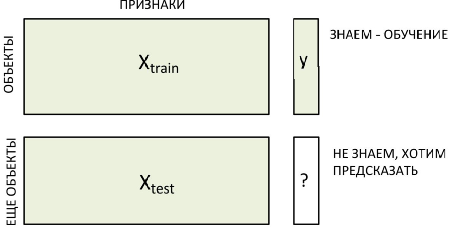

Модели машинного обучения - это некоторые математические правила (обычно функции), по которым модель делает прогноз.

**Пример (линейная регрессия):**

$price = a + b\cdot carat + c\cdot depth,$

здесь $a,b,c$ - параметры модели (заранее мы их не знаем).

*Параметры подбираются по обучающим данным так, чтобы модель ошибалась меньше всего.*

Пример плохо подобранных параметров $a, b$ модели
$$y = a + b\cdot x.$$

На рисунке
$$y = -30 + 7x.$$

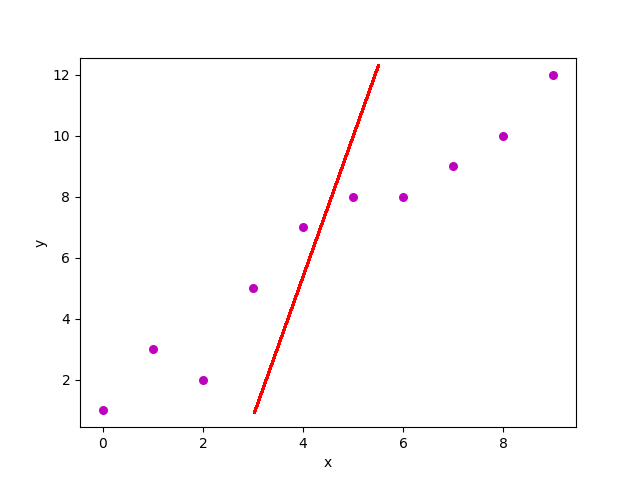

Пример хорошо подобранных параметров:
$$y = 0.5 + x.$$

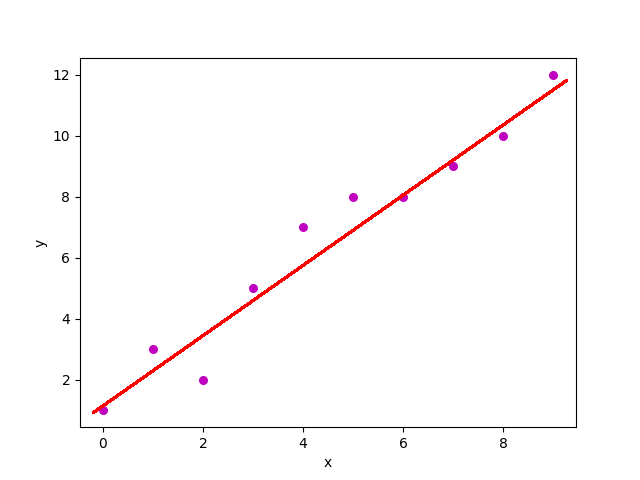

Функции для построения прогнозов бывают разные:

* линейные модели
* решающие правила (если $a$, то $b$)
* нейронные сети
* другие модели

Каждая модель хорошо работает в своих предположениях о данных, поэтому изучить распределение целевой переменной всегда очень полезно.

Обучим линейную регрессию предсказывать цену по числу карат.

In [58]:
X = df[['carat']] # матрица объект-признак
y = df['price'] # целевая переменная

In [59]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

pred = lr.predict(X)

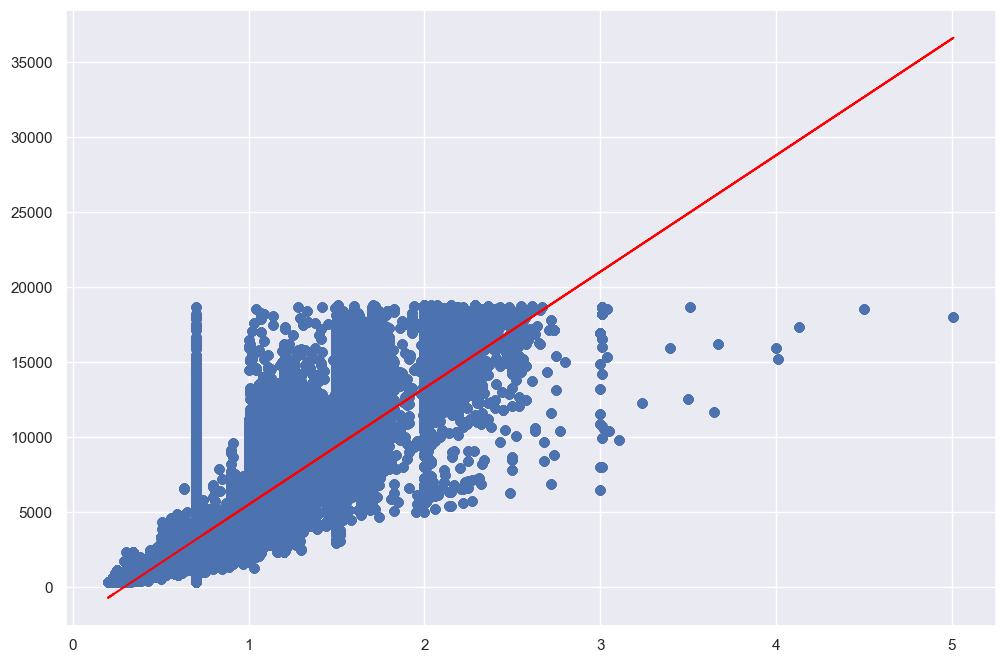

In [60]:
plt.scatter(X.values, y)
plt.plot(X.values, pred, c='red')

Вычислим ошибку модели

$$MAE = \frac1l\sum_{i=1}^l |a(x_i)-y_i|$$

In [61]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y, pred)

1025.0975451766992

In [62]:
np.mean(y)

np.float64(3931.718588480274)

## Анализ распределения столбцов (целевой переменной)

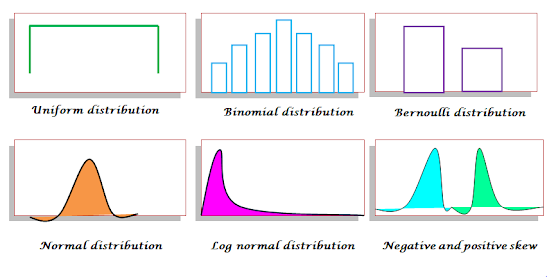

В основном в задачах регрессии мы ожидаем увидеть нормально распределенную целевую переменную. Многие модели заточены под нормальное распределение.

Но не только в этом дело...

<Axes: xlabel='price', ylabel='Count'>

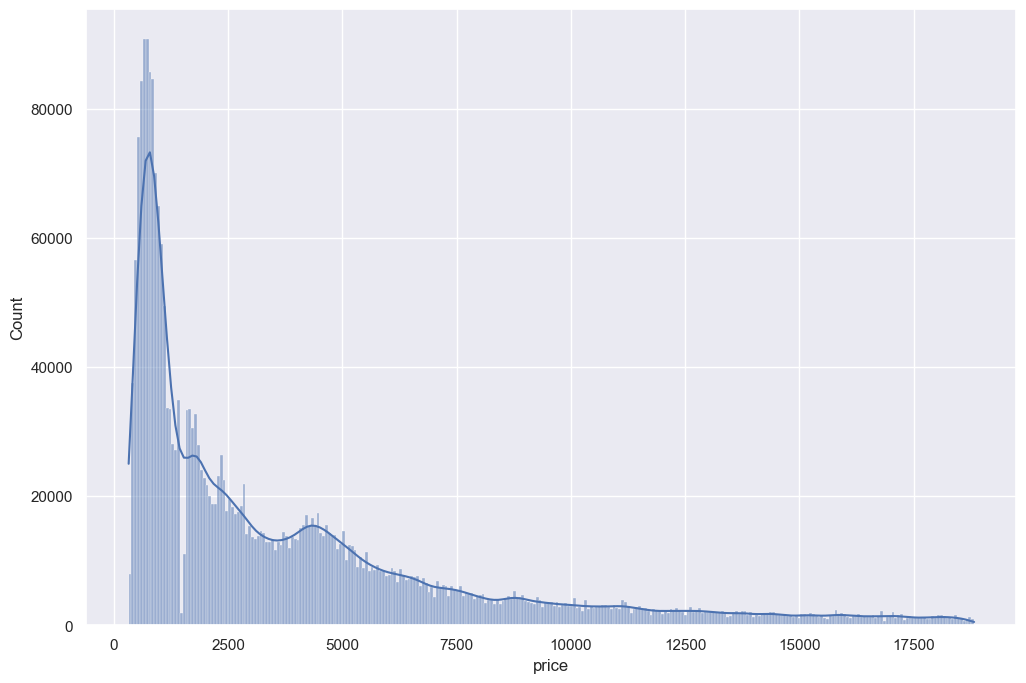

In [63]:
sns.histplot(data = df['price'], kde = True)

<Axes: xlabel='price', ylabel='Count'>

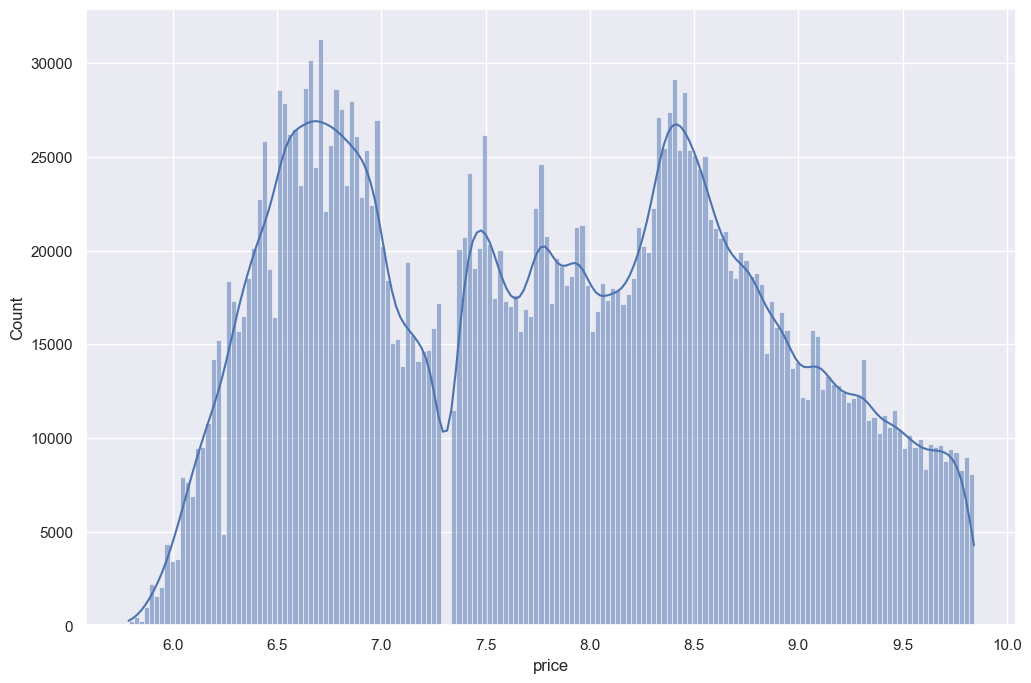

In [64]:
sns.histplot(data = np.log(df['price']), kde = True)

Мы видим у распределения тяжелый хвост, который может быть трудно прогнозируем моделями (так как там мало значений).

Проверим это.

In [65]:
mean_absolute_error(y[y < 10000], pred[y < 10000])

812.5919391171038

In [66]:
mean_absolute_error(y[y >= 10000], pred[y >= 10000])

3010.635502101987

Действительно, ошибка на дорогих алмазах больше.

In [67]:
X2 = df[['carat']]
y2 = df['depth']

lr = LinearRegression()
lr.fit(X2, y2)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [68]:
pred_depth = lr.predict(X2)

mean_absolute_error(y2, pred_depth), np.mean(y2)

(1.0074215822488022, np.float64(61.74943293793924))

<Axes: xlabel='depth', ylabel='Count'>

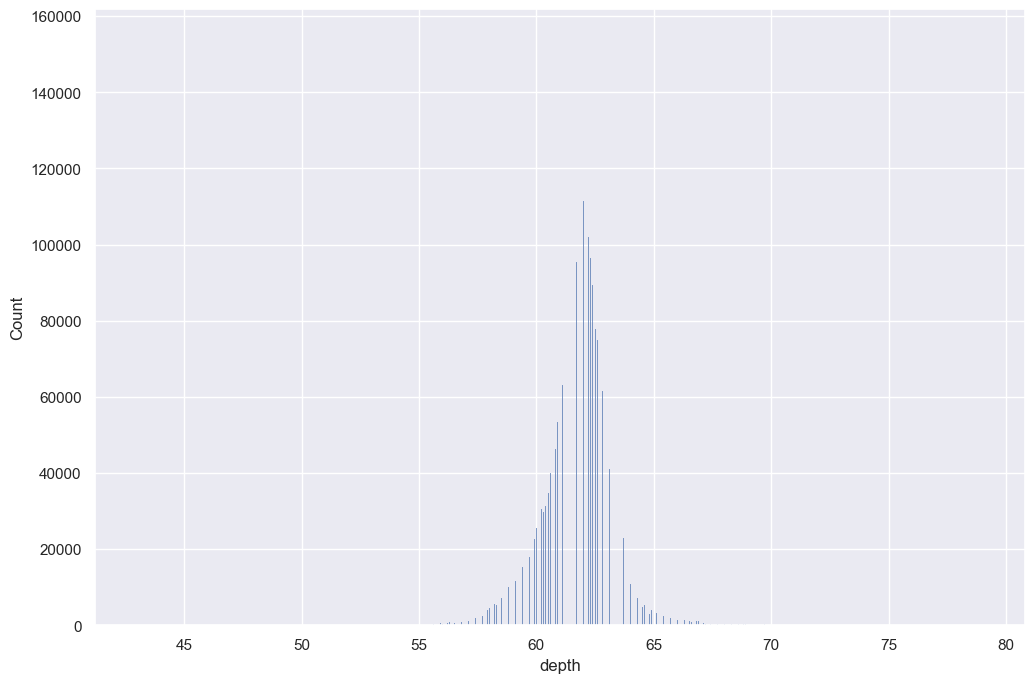

In [69]:
sns.histplot(df.depth)

In [70]:
len(y2[y2<60])/len(y2) # доля выборки

0.09279366377867847

In [71]:
mean_absolute_error(y2[y2<60], pred_depth[y2<60])

2.7812013965752236

In [72]:
len(y2[(y2 >= 60) & (y2 <= 63)])/len(y2) # доля выборки

0.7786412821180233

In [73]:
mean_absolute_error(y2[(y2 >= 60) & (y2 <= 63)], pred_depth[(y2 >= 60) & (y2 <= 63)])

0.6017121217716941

## Задание 4

Будем решать задачу прогноза стоимости алмаза по его параметру `table`.

Обучите линейную регрессию для решения этой задачи и выведите на экран ошибку MAE.

In [74]:
# your code here

X = df[['table']]
y = df['price']

lr = LinearRegression()
lr.fit(X, y)

pred = lr.predict(X)
mean_absolute_error(y, pred)

2987.4951264964297

## Задание 5

Сколько процентов от среднего значения `price` составляет ошибка?

In [76]:
# your code here

float(mean_absolute_error(y, pred) / df['price'].mean() * 100)

75.9844597029307

## Задание 6

Вычислите ошибку MAE для алмазов маленькой и большой стоимости отдельно:

* `price` < 10_000
* `price` >= 10_000

Какая из ошибок больше?

Как вы думаете почему?

In [79]:
# your code here

df_small = df[df['price'] < 10000]
df_big = df[df['price'] >= 10000]

print(f'Ошибка для маленьких алмазов: {mean_absolute_error(df_small['price'], lr.predict(df_small[['table']]))}')
print(f'Ошибка для больший алмазов: {mean_absolute_error(df_big['price'], lr.predict(df_big[['table']]))}')

Ошибка для маленьких алмазов: 2279.0981133016808
Ошибка для больший алмазов: 9606.375373242598


In [ ]:
len(df_small), len(df_big)

(49557, 5304)

## Ошибка на больших алмазах больше, так как их меньше и моделе труднее уловить зависимость. Также очень дорогие алмазы в цене очень сильно отличаются, что тоже добавляет дисперсии к предсказаниям. Ещё чем больше таргетная переменная, тем больше на ней ошибка (логично, так как мы смотрим не относительную метрику, а абсолютную)